# Importando bibliotecas necessárias
Vamos começar importando as bibliotecas necessárias para criar nosso modelo de árvore de decisão.

- `pandas` para manipulação de dados.
- `sklearn` para implementar o modelo de Naive Bayes e avaliar seu desempenho.
- `train_test_split` para dividir nosso conjunto de dados em conjuntos de treinamento e teste.
- `DecisionTreeClassifier` para implementar o modelo de árvore de decisão.
- `accuracy_score`, `precision_score`, `recall_score`, `f1_score` e `confusion_matrix` para avaliar o desempenho do modelo.
- `matplotlib` e `seaborn` para visualização dos resultados.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregando os Dados 
df = pd.read_csv(r"C:\Users\maype\OneDrive\Área de Trabalho\projects\projeto-aprendizado-de-maquina\Data\base_balanceada.csv")

Primeiras linhas dos dados:

Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71530 entries, 0 to 71529
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       71530 non-null  int64  
 1   Sexo                             71530 non-null  float64
 2   Apoio_Familiar                   71530 non-null  float64
 3   Apoio_de_Amigos                  71530 non-null  float64
 4   Tipo_de_Trabalho                 71530 non-null  float64
 5   Curso_Mais_Elevado               71530 non-null  float64
 6   A005010                          71530 non-null  float64
 7   Estado_de_Saude                  71530 non-null  float64
 8   Pratica_Exercicio                71530 non-null  float64
 9   Exercicio_Mais_Frequente         71530 non-null  float64
 10  Ultima_Consulta_Medica           71530 non-null  float64
 11  Procura_Atendimento_Sau

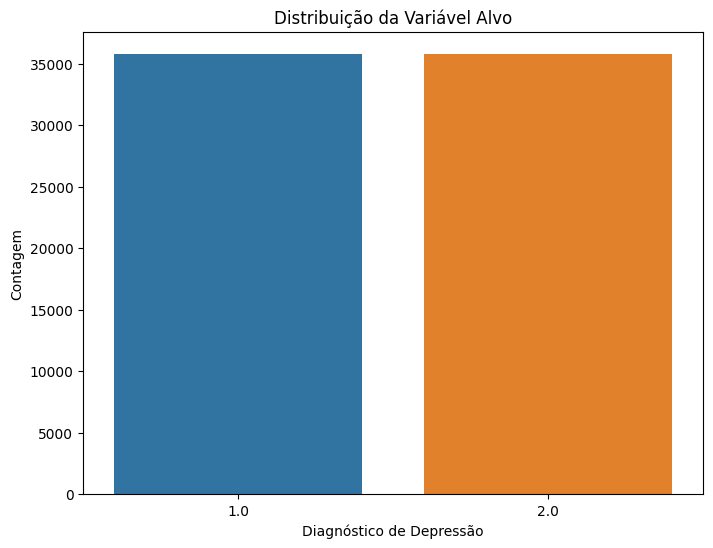

In [3]:
# Visualizando as primeiras linhas dos dados
print("Primeiras linhas dos dados:")
df.head()

# Verificando informações sobre os tipos de dados e valores ausentes
print("\nInformações sobre os dados:")
df.info()

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
df.isnull().sum()

# Explorando a distribuição da variável alvo
print("\nDistribuição da variável alvo:")
df['Diagnostico_Depressao'].value_counts()

# Visualizando a distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnostico_Depressao', data=df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Diagnóstico de Depressão')
plt.ylabel('Contagem')
plt.show()

In [4]:
# Dividindo os dados em conjuntos de treinamento e teste
X = df.drop('Diagnostico_Depressao', axis=1)  # Features
y = df['Diagnostico_Depressao']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de Árvore de Decisão
Vamos treinar o modelo de árvore de decisão da mesma forma que fizemos com o Naive Bayes.

- Criaremos uma instância do modelo `DecisionTreeClassifier`.
- Ajustaremos o modelo aos dados de treinamento usando o método `.fit()`.

In [8]:
# Criando uma instância do modelo de Árvore de Decisão
decision_tree_model = DecisionTreeClassifier(max_depth=20, criterion= 'entropy', max_features= 'sqrt')

# Treinando o modelo com os dados de treinamento
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt')

### Avaliação do modelo de Árvore de Decisão


*   Faremos previsões nos dados de teste usando o método `.predict()`.
*   Avaliaremos o modelo usando as mesmas métricas de desempenho: acurácia, precisão, recall, pontuação F1 e matriz de confusão.

In [9]:
# Fazendo previsões nos dados de teste
y_pred_tree = decision_tree_model.predict(X_test)

# Avaliando o modelo de Árvore de Decisão
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Métricas de Desempenho do Modelo de Árvore de Decisão:")
print(f"Acurácia: {accuracy_tree}")
print(f"Precisão: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"Pontuação F1: {f1_tree}")
print("\nMatriz de Confusão:")
print(conf_matrix_tree)


Métricas de Desempenho do Modelo de Árvore de Decisão:
Acurácia: 0.9039563819376485
Precisão: 0.8970081345650076
Recall: 0.912098696200757
Pontuação F1: 0.9044904768524955

Matriz de Confusão:
[[6506  627]
 [ 747 6426]]


### Interpretação dos resultados da Árvore de Decisão

Agora, vamos interpretar os resultados das métricas de desempenho e da matriz de confusão para o modelo de Árvore de Decisão.

*   **Acurácia**: Mede a proporção de previsões corretas do modelo.
*   **Precisão**: Mede a proporção de verdadeiros positivos em relação ao total de positivos previstos pelo modelo.
*   **Recall**: Mede a proporção de verdadeiros positivos em relação ao total de positivos reais no conjunto de dados.
*   **Pontuação F1**: É a média harmônica da precisão e do recall. É uma métrica que leva em consideração tanto a precisão quanto o recall.
*   **Matriz de Confusão**: Mostra a distribuição das previsões do modelo em relação aos verdadeiros rótulos. Ela contém informações sobre os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

C:\Users\maype\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


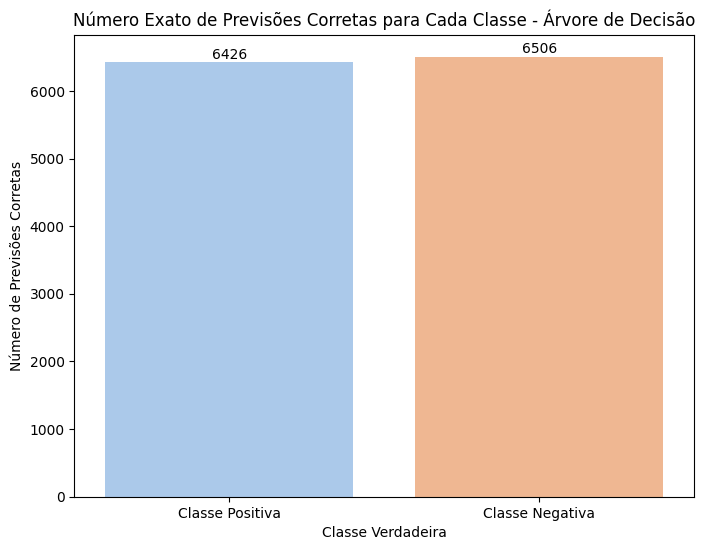

In [10]:
# Calculando TP, FP, TN e FN para o modelo de Árvore de Decisão
TP_tree = conf_matrix_tree[1, 1]  # Verdadeiros positivos (classe positiva corretamente prevista)
FP_tree = conf_matrix_tree[0, 1]  # Falsos positivos (classe negativa incorretamente prevista como positiva)
TN_tree = conf_matrix_tree[0, 0]  # Verdadeiros negativos (classe negativa corretamente prevista)
FN_tree = conf_matrix_tree[1, 0]  # Falsos negativos (classe positiva incorretamente prevista como negativa)

# Plotando o número exato de previsões corretas para cada classe para o modelo de Árvore de Decisão
plt.figure(figsize=(8, 6))
sns.barplot(x=['Classe Positiva', 'Classe Negativa'], y=[TP_tree, TN_tree], palette='pastel')
plt.title('Número Exato de Previsões Corretas para Cada Classe - Árvore de Decisão')
plt.xlabel('Classe Verdadeira')
plt.ylabel('Número de Previsões Corretas')
for i, v in enumerate([TP_tree, TN_tree]):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()

